In [1]:

import swin
import os

petfinder_transformer = swin.PetfinderTransformer(seed=1337, dataset_parent="../../petfinder-pawpularity-score",
                                                  train_test_json_path="../train_test_val.json")



  0%|          | 0/992 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


epoch,train_loss,valid_loss,custom_rmse,time
0,0.668458,0.667271,21.031588,00:53
1,0.660487,0.658728,20.068106,00:53
2,0.651955,0.647720,18.706127,00:53
3,0.645439,0.643126,18.117023,00:53
4,0.640436,0.641177,17.874998,00:53
5,0.636079,0.641276,17.872976,00:53
6,0.633652,0.641053,17.823200,00:53
7,0.632221,0.640179,17.730064,00:53
8,0.628813,0.641257,17.857338,00:53
9,0.627062,0.642489,18.009901,00:53


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Better model found at epoch 0 with valid_loss value: 0.6672714948654175.
Better model found at epoch 1 with valid_loss value: 0.6587275862693787.
Better model found at epoch 2 with valid_loss value: 0.6477199792861938.
Better model found at epoch 3 with valid_loss value: 0.643126368522644.
Better model found at epoch 4 with valid_loss value: 0.6411768198013306.
Better model found at epoch 6 with valid_loss value: 0.6410525441169739.
Better model found at epoch 7 with valid_loss value: 0.6401785016059875.
No improvement since epoch 7: early stopping
Model successfully fit.


Model RMSE: 0.1789087039256781.
Config file saved to path models/config.json


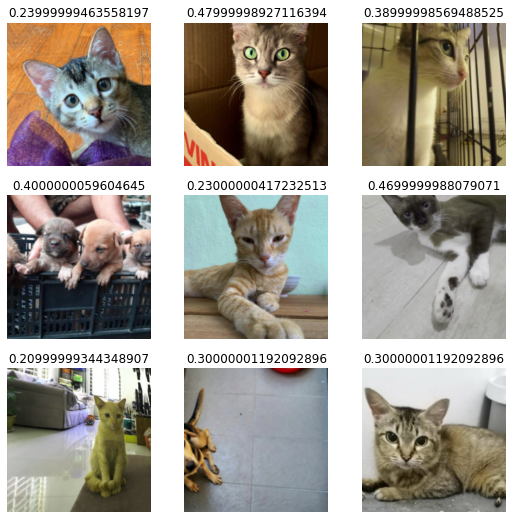

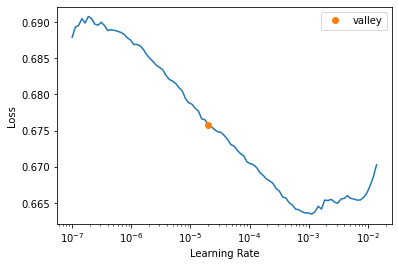

In [2]:
petfinder_transformer.wrap_model(batch_size=108, image_size=224,
                                  model_name="swin_large_patch4_window7_224", epochs=15, save_path="models", loss_function="BCEWithLogitsLossFlat")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("history.csv")
df

,epoch,train_loss,valid_loss,custom_rmse,time
0,0,0.668458,0.667271,21.031588,00:53
1,1,0.660487,0.658728,20.068106,00:53
2,2,0.651955,0.647720,18.706127,00:53
3,3,0.645439,0.643126,18.117023,00:53
4,4,0.640436,0.641177,17.874998,00:53
5,5,0.636079,0.641276,17.872976,00:53
6,6,0.633652,0.641053,17.823200,00:53
7,7,0.632221,0.640179,17.730064,00:53
8,8,0.628813,0.641257,17.857338,00:53
9,9,0.627062,0.642489,18.009901,00:53


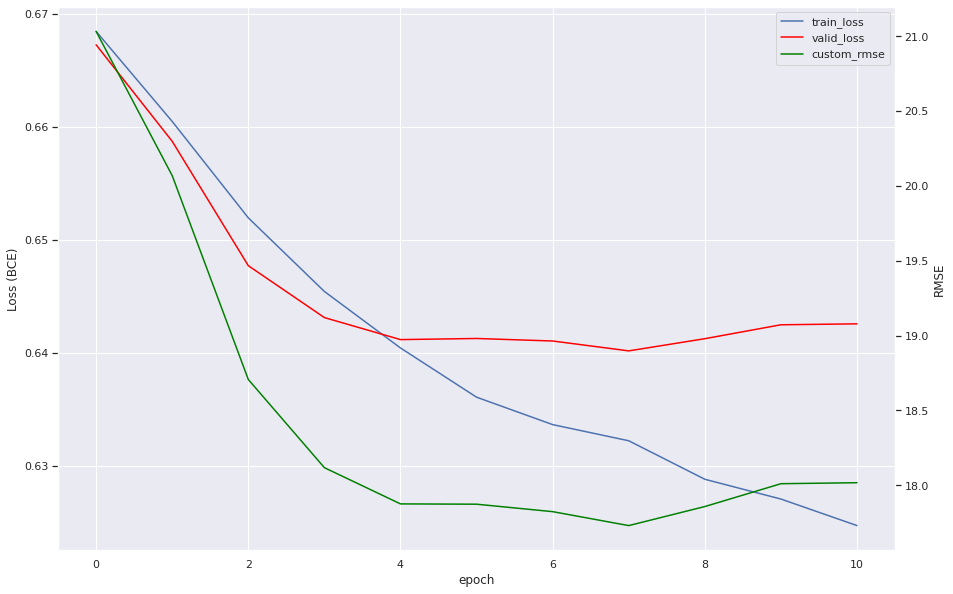

In [5]:
ax = plt.gca()
ax2 = ax.twinx()
df.plot(kind='line',x='epoch',y='train_loss',ax=ax, figsize=(15,10))
df.plot(kind='line',x='epoch',y='valid_loss', color='red', ax=ax)
df.plot(kind='line',x='epoch',y='custom_rmse', color='green', ax=ax2)
ax2.grid()

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax.set_ylabel('Loss (BCE)')
ax2.set_ylabel('RMSE')
ax.legend(lines, labels, loc=0)
ax2.get_legend().remove()
plt.savefig("training_loss.png")
plt.show()